In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.random.seed(777)
 
# t = np.arange(10)
 
# x_0 = t + 2+ np.random.randn(10)
# x_1 = 2*t + 2+ np.random.randn(10)
# x_2 = -2*t + 10 + np.random.randn(10)
# X = np.vstack((x_0, x_1, x_2))
# S = np.cov(X); print(S)
# m = np.var(X, axis = 1); print(m)

S = np.array([[0.8, 0.6, 0.3],
             [0.6, 0.7,  0.1],
             [0.3, 0.1, 0.8]])
m = np.array([2, 2, 2])
d = 2; epsilon = 1

In [3]:
# plt.subplot(3,1,1)
# plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'r')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(3,1,2)
# plt.scatter(X[:, 1], X[:, 2], s = 100,c = 'g')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(3,1,3)
# plt.scatter(X[:, 2], X[:, 0], s = 100)
# plt.xticks([])
# plt.yticks([])
# plt.show()

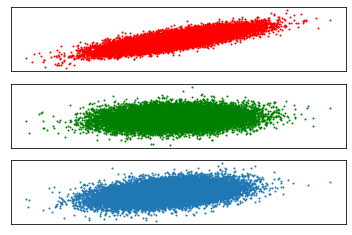

In [4]:
num_points = 20_000

X = np.random.multivariate_normal(m, S, num_points)
plt.subplot(3,1,1)
plt.scatter(X[:, 0], X[:, 1], s = 1, c = 'r')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X[:, 1], X[:, 2], s = 1,c = 'g')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X[:, 2], X[:, 0], s = 1)
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
def remove_dots_by_rule (X):
    S1 = np.linalg.inv(S)
    d = (S[0][0]**2+S[1][1]**2+S[2][2]**2)*0.5
    #d = np.array([0.5,0.6,0.8]).dot(S[0][0]+S[1][1]+S[2][2]); d = d.dot(d); 
    X1 = np.array([[0,0,0]]); X2 =  np.array([[0,0,0]]);
    epsilon = 0.1*d
    for i in range (len(X)):
        X_ =  X-m;
        if (X_[i]).dot(S1.dot(X_[i].T)) >= d + epsilon: X1 = np.vstack((X1, X_[i]));
        if (X_[i]).dot(S1.dot(X_[i].T)) <= d - epsilon: X2 = np.vstack((X2, X_[i]))                                                                          
    return  X1[1:,:],X2[1:,:]           

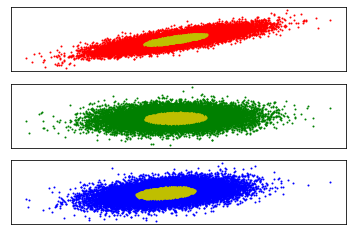

16095 2988


In [6]:
X1,X2 = remove_dots_by_rule (X)


plt.subplot(3,1,1)
plt.scatter(X1[:, 0], X1[:, 1], s = 1, c = 'r');plt.scatter(X2[:, 0], X2[:, 1], s = 1, c = 'y')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,2)
plt.scatter(X1[:, 1], X1[:, 2], s = 1,c = 'g');plt.scatter(X2[:, 1], X2[:, 2], s = 1,c = 'y')
plt.xticks([])
plt.yticks([])
plt.subplot(3,1,3)
plt.scatter(X1[:, 2], X1[:, 0], s = 1, c = 'b');plt.scatter(X2[:, 2], X2[:, 0], s = 1, c = 'y')
plt.xticks([])
plt.yticks([])
plt.show()

print(len(X1),len(X2))

In [7]:
def ksi(x):
    a = np.array([])
    #indexes = np.array([])
    for i in range(3):
        for j in range(3):
            a = np.append(a,x[i]*x[j])
            #indexes = np.append(indexes,f'{i},{j}')
    for i in range(3):
        a = np.append(a,x[i])
        #indexes = np.append(indexes,f'{i}')
    #print(indexes)
    a = np.append(a,1)
    return a

In [8]:
def find_k(A,m):
    k = 0
    for i in range(3):
        for j in range(3):
            k += A[i][j]*m[i]*m[j]
    return k
    

In [9]:
# def eta (A,m):
#     a = np.array([])
#     #indexes = np.array([])
#     for i in range(3):
#         for j in range(3):
#             a = np.append(a,A[i][j])
#             #indexes = np.append(indexes,f'{i},{j}')
#     for i in range(3):
#         for j in range(3):
#         a = np.append(a,-m[j]*A[i][j])
#         #indexes = np.append(indexes,f'{i}')
#     #print(indexes)
#     a = np.append(a,find_k(S,m))
#     return a

In [10]:
X_for_perceptron = np.concatenate ((X1,-X2))
X_for_perceptron

array([[ 0.03981806,  1.18489273, -0.39911472],
       [-0.27104868,  0.30688706,  0.87900661],
       [-1.60763464, -0.37457472, -1.52465613],
       ...,
       [-0.16939677, -0.44517955,  0.0887115 ],
       [ 0.64214271,  0.65536919, -0.01361886],
       [ 0.41128022,  0.04036846,  0.38916302]])

In [11]:
X_for_test = np.concatenate ((X1,X2))
Y_true = np.concatenate([np.zeros(len(X1)),np.ones(len(X2))])

In [12]:
def X_to_ksi_X (X):
    a = np.zeros(13)
    for i in range(len(X)):
        a = np.vstack((a,ksi(X[i])))
    return a[1:,:]
KSI = X_to_ksi_X (X_for_perceptron)
print(KSI[1])

[ 0.07346739 -0.08318133 -0.23825358 -0.08318133  0.09417967  0.26975575
 -0.23825358  0.26975575  0.77265263 -0.27104868  0.30688706  0.87900661
  1.        ]


In [13]:
np.set_printoptions(precision=30)

def show_results (X,S,m):
    
    #S1 = np.linalg.inv(S)
    S1 = S
    d = (S[0][0]**2+S[1][1]**2+S[2][2]**2)*0.5
    #d = np.array([0.5,0.6,0.8]).dot(S[0][0]+S[1][1]+S[2][2]); d = d.dot(d); 
    X1 = np.array([[0,0,0]]); X2 =  np.array([[0,0,0]]);
    epsilon = 0.1*d
    for i in range (len(X)):
        X_ =  X-m;
        if (X_[i]).dot(S1.dot(X_[i].T)) >= d + epsilon: X1 = np.vstack((X1, X_[i]));
        if (X_[i]).dot(S1.dot(X_[i].T)) <= d - epsilon: X2 = np.vstack((X2, X_[i]))                                                                                
    
            
    X1 = X1[1:,:];X2 = X2[1:,:] 
    plt.subplot(3,1,1)
    plt.scatter(X1[:, 0], X1[:, 1], s = 1, c = 'r');plt.scatter(X2[:, 0], X2[:, 1], s = 1, c = 'y')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,1,2)
    plt.scatter(X1[:, 1], X1[:, 2], s = 1,c = 'g');plt.scatter(X2[:, 1], X2[:, 2], s = 1,c = 'y')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3,1,3)
    plt.scatter(X1[:, 2], X1[:, 0], s = 1, c = 'b');plt.scatter(X2[:, 2], X2[:, 0], s = 1, c = 'y')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return  X1,X2

In [14]:
def get_S_m (a, L):
    k = 0
    K = np.zeros((a,a))
    #print(a)
    for i in range (a):
        for j in range (a):
            #print(L[k])
            K[i][j] = L[k]
            k+=1
    g = np.zeros(3)
    for i in range (a):
        g[i] = L[k+i] 
    return K, -g/2

In [15]:
def transoform_eig_vectors(vector):
    transformed = []
    for v in vector:
        out = []
        for i in range(3):
            for j in range(3):
                out.append(v[i]*v[j])
        for i in range(3):
            out.append(v[i])
        out.append(0)
        transformed.append(out)
    return np.array(transformed)
def get_eigenvectors(lambd):
    A = lambd[:9].reshape(3,3)
    values, vectors = np.linalg.eigh(A)
    vectors = vectors.T
    transformed_vectors = transoform_eig_vectors(vectors)
    return transformed_vectors, values


----------------------------
[[ 0.8790718155186773  -0.19574688536504456 -0.2951868498453535 ]
 [-0.18972312945624722  0.7394108334940045  -0.38140723850862135]
 [-0.2904009393672273  -0.3684297404905992   0.47509044014202745]] 

 [-0.6517599078594518   0.11888372323673466  0.16335294221848207]


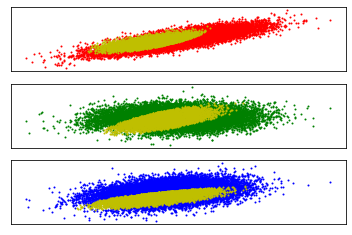

----------------------------
[[ 0.8864185543264762  -0.20406501859036186 -0.3190122082739655 ]
 [-0.19804126268156452  0.7488288000454597  -0.35443166325885844]
 [-0.31422629779583927 -0.34145416524083627  0.5523557028799995 ]] 

 [-0.638207473753544    0.10353937040625072  0.1194026115206443 ]


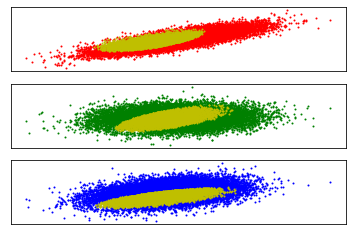

----------------------------
[[ 0.9035859478114278  -0.20200797898782938 -0.33116335183319323]
 [-0.19598422307903204  0.7490752796249076  -0.355887643372514  ]
 [-0.326377441355067   -0.3429101453544918   0.560956326493968  ]] 

 [-0.6174906970466384   0.1060217058965092   0.10473920160517061]


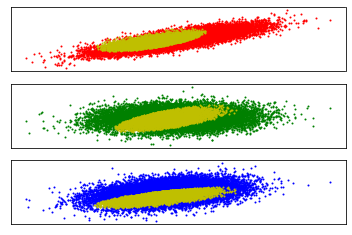

----------------------------
[[ 1.0763359488523618  -0.16522386219340152 -0.1802245230898762 ]
 [-0.15920010628460418  0.7569078193655325  -0.32374783745730185]
 [-0.17543861261174998 -0.3107703394392797   0.6928378308941094 ]] 

 [-0.5517734997081688   0.12001504336530565  0.16215903798602022]


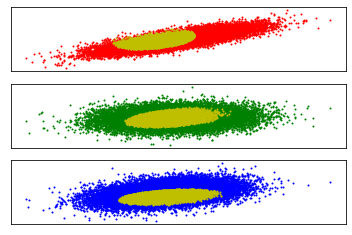

Final-----------------------
S an m WE GOT 
 [[ 1.0763359488523618  -0.16522386219340152 -0.1802245230898762 ]
 [-0.15920010628460418  0.7569078193655325  -0.32374783745730185]
 [-0.17543861261174998 -0.3107703394392797   0.6928378308941094 ]] 

 [-0.5517734997081688   0.12001504336530565  0.16215903798602022] 

 REAL S an m 

 [[0.8 0.6 0.3]
 [0.6 0.7 0.1]
 [0.3 0.1 0.8]] 

 [2 2 2]


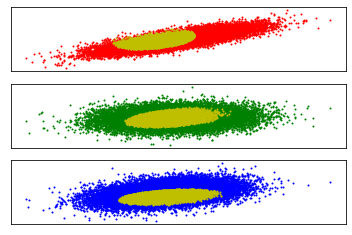

In [16]:
def perceptron(KSI,L = np.zeros(13)):
    t_v,values = get_eigenvectors(L)
    for i in range(len(values)):
        if values[i]<=0:
            L+=t_v[i]
    for i in range(len(KSI)):
        if np.dot(L,KSI[i])<=0: L+=0.1*KSI[i];print('----------------------------');K,g = get_S_m (3,L); print(K,'\n\n',g); show_results (X_for_test,K,g); return perceptron(KSI,L);
    for i in range(len(values)):
        if values[i]<=0:
            L+=t_v[i]
    print('Final-----------------------')
    K,g = get_S_m (3,L);print('S an m WE GOT \n',K,'\n\n',g,'\n\n','REAL S an m','\n\n',S,'\n\n',m );show_results (X_for_test,K,g)
    return L
L = perceptron(KSI,np.random.uniform(-0.01, 0.01, 13))        

In [17]:
def check ():
    indexes = np.array([])
    for i in range(3):
        for j in range(3):
            indexes = np.append(indexes,f'{i},{j}')
    for i in range(3):
        for _ in range(3):
            indexes = np.append(indexes,f'{i}')
    print(indexes)
check ()

['0,0' '0,1' '0,2' '1,0' '1,1' '1,2' '2,0' '2,1' '2,2' '0' '0' '0' '1' '1'
 '1' '2' '2' '2']
